# Tips

In [115]:
%matplotlib inline
import pandas as pd
import seaborn as sb

In [116]:
flights = sb.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


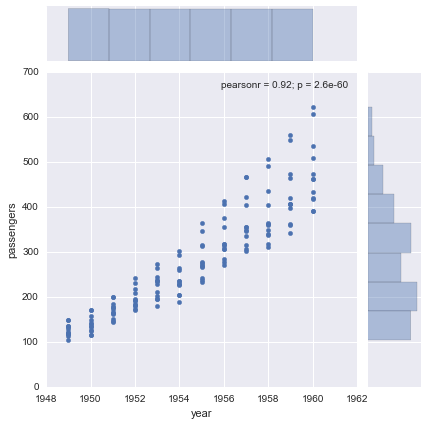

In [117]:
sb.jointplot("year", "passengers", flights)

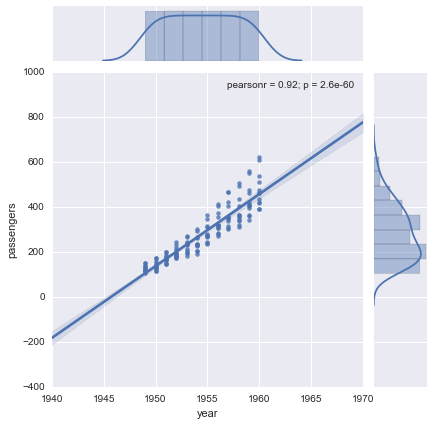

In [118]:
sb.jointplot("year", "passengers", flights, kind='reg')

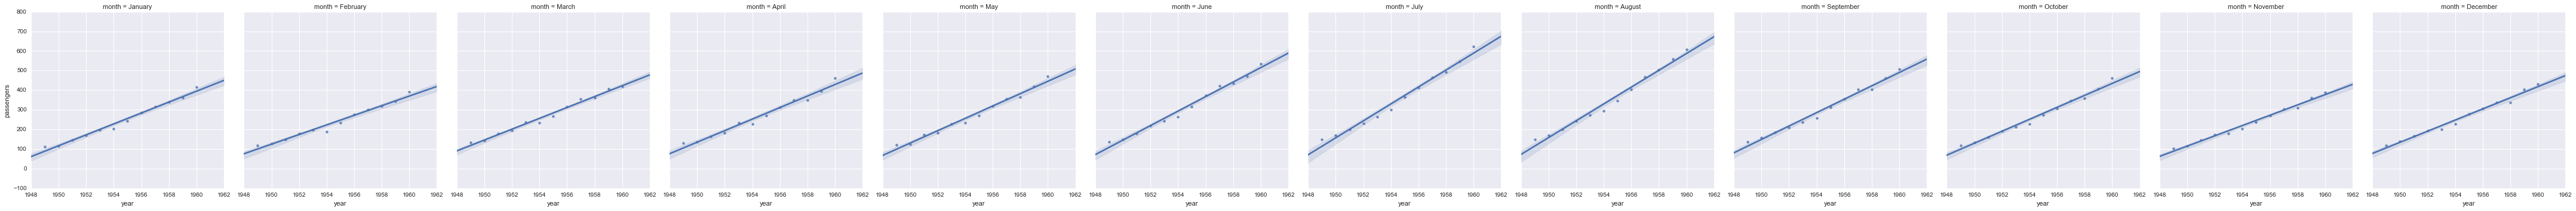

In [119]:
sb.lmplot("year", "passengers", flights, col="month")

In [120]:
X = flights.loc[:,['year','month']]
X.head()

,year,month
0,1949,January
1,1949,February
2,1949,March
3,1949,April
4,1949,May


In [121]:
months = X_pretty.loc[:,'month'].values
month_categories = pd.Categorical.from_array(months)
X.loc[:,'month'] = month_categories.codes
X.head()

,year,month
0,1949,0
1,1949,1
2,1949,2
3,1949,3
4,1949,4


In [122]:
y = flights['passengers']
y.head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

In [123]:
import sklearn as sk
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.head()

,year,month
133,1960,1
52,1953,4
123,1959,3
102,1957,6
131,1959,11


In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
from sklearn import linear_model
clf1 = linear_model.LinearRegression()
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.81904882873837148

In [157]:
from sklearn.svm import SVR
clf2 = SVR(gamma=0.001, C=100.)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.093129544444963019

In [158]:
from sklearn.grid_search import GridSearchCV
param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf3 = SVR()
grid_search = GridSearchCV(clf3, param_grid)
grid_search.fit(X_train, y_train)
clf3 = grid_search.best_estimator_
clf3.score(X_test, y_test)

0.95032544288974408